In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Full_Data_Nubi_Drive_NEW.csv')

In [3]:
psy=pd.read_csv('Psychometric_Data.csv')

In [4]:
psy=pd.get_dummies(psy, columns=['Gender'])

In [5]:
df['BPM Div']=df['BPM']

In [6]:
station=df[df['Trip'].isnull()]
station2 = station[station['BPM'].notna()]
df_12=station2[station2['P_ID']=='P12']
df_13=station2[station2['P_ID']=='P13']
df_15=station2[station2['P_ID']=='P15']
df_17=station2[station2['P_ID']=='P17']
df_18=station2[station2['P_ID']=='P18']
df_19=station2[station2['P_ID']=='P19']
df_20=station2[station2['P_ID']=='P20']
df_22=station2[station2['P_ID']=='P22']
df_23=station2[station2['P_ID']=='P23']
df_24=station2[station2['P_ID']=='P24']
df_27=station2[station2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
new_arr=[]

for elem in arr:
    avg=elem['BPM'].mean()
    new_arr.append(avg)
new_df=pd.DataFrame()
new_df['P_ID']=['P12','P13','P15','P17','P18','P19','P20','P22','P23','P24','P27']
new_df['Averages']=new_arr

In [7]:
df_2=df.drop(['Time', 'latitudes', 'longitudes', 'Time_Second'], axis=1)

In [8]:
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)
df_2=pd.get_dummies(df_2, columns=['Day','Src_Weather_Info','Des_Weather_Info'])

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_51483/410985319.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [9]:
df_12=df_2[df_2['P_ID']=='P12']
df_13=df_2[df_2['P_ID']=='P13']
df_15=df_2[df_2['P_ID']=='P15']
df_17=df_2[df_2['P_ID']=='P17']
df_18=df_2[df_2['P_ID']=='P18']
df_19=df_2[df_2['P_ID']=='P19']
df_20=df_2[df_2['P_ID']=='P20']
df_22=df_2[df_2['P_ID']=='P22']
df_23=df_2[df_2['P_ID']=='P23']
df_24=df_2[df_2['P_ID']=='P24']
df_27=df_2[df_2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
counter=0
for elem in arr:
    elem['BPM Div']=elem['BPM']/new_arr[counter]
    elem['BPM']=elem['BPM']-new_arr[counter]
    counter+=1
    
df_new=pd.concat([df_12, df_13, df_15, df_17, df_18, df_19, df_20, df_22, df_23, df_24, df_27])

# df_2=df_new.drop('P_ID', axis=1)
df_2=df_new

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_51483/3058316295.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem['BPM Div']=elem['BPM']/new_arr[counter]
/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_51483/3058316295.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem['BPM']=elem['BPM']-new_arr[counter]
/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_51483/3058316295.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [10]:
df_2=pd.merge(df_2, psy, on='P_ID')

In [11]:
df_2=df_2[df_2['Trip'].notna()]
df_2=df_2[df_2['BPM'].notna()]

In [12]:
df_2=pd.get_dummies(df_2, columns=['Trip'])

In [13]:
df_2.drop('P_ID', axis=1, inplace=True)

In [14]:
df_2=df_2.dropna(axis=0)

## Predict BPM difference

In [15]:
temp=df_2['BPM']
df_3=df_2.drop(['BPM', 'BPM Div'], axis=1)
Y=temp.values
X=df_2.values

In [16]:
df_3

,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Day_Day1,Day_Day2,...,Openness,Gender_Female,Gender_Male,Trip_Trip1,Trip_Trip2,Trip_Trip3,Trip_Trip4,Trip_Trip5,Trip_Trip6,Trip_Trip7
8906,20.500000,16.900000,28.9,1.70738,24.79,84.04,1014.0,10.36,0,1,...,6,1,0,1,0,0,0,0,0,0
8911,9.500000,20.000000,28.9,1.43925,25.85,84.04,1014.0,10.36,0,1,...,6,1,0,1,0,0,0,0,0,0
8912,22.000000,16.600000,28.9,1.70738,24.79,84.04,1014.0,10.36,0,1,...,6,1,0,1,0,0,0,0,0,0
8920,0.333333,16.900000,28.9,2.42528,28.40,84.04,1014.0,10.36,0,1,...,6,1,0,1,0,0,0,0,0,0
8933,3.333333,17.300000,28.9,2.42528,28.40,84.04,1014.0,10.36,0,1,...,6,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064695,15.333333,16.866667,29.5,0.00000,45.61,93.45,1017.0,10.36,0,0,...,7,0,1,0,1,0,0,0,0,0
2064700,20.000000,11.000000,29.5,0.00000,45.61,93.45,1017.0,10.36,0,0,...,7,0,1,0,1,0,0,0,0,0
2064704,15.000000,10.350000,29.5,0.00000,45.61,93.45,1017.0,10.36,0,0,...,7,0,1,0,1,0,0,0,0,0
2064710,4.500000,14.050000,29.5,0.00000,45.61,93.45,1017.0,10.36,0,0,...,7,0,1,0,1,0,0,0,0,0


In [17]:
from sklearn import ensemble

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
from sklearn.model_selection import KFold

In [20]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [21]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_3.iloc[train_index],df_3.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [20]:
# gb = GradientBoostingRegressor(learning_rate=0.1)

In [21]:
# gb.fit(X_train,y_train)

In [20]:
# gb.score(X_test, y_test)

0.5467783524729867

In [21]:
# print(gb.feature_importances_)

[0.02189888 0.02305711 0.13835596 0.01016508 0.02250809 0.19119727
 0.08048844 0.19542853 0.02232641 0.06696474 0.00790592 0.0208417
 0.01836798 0.00951038 0.05242805 0.00456903 0.00065282 0.
 0.01452991 0.00182657 0.00186826 0.0008479  0.00915345 0.00031204
 0.00208483 0.00192578 0.03351211 0.00375687 0.         0.02224798
 0.00452614 0.00835918 0.00838261]


In [22]:
# X_train.keys()

Index(['Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF', 'Src_Temperature',
       'Src_Pressure', 'Src_WindSpeed', 'Day_Day1', 'Day_Day2', 'Day_Day3',
       'Day_Day4', 'Day_Day5', 'Day_Day6', 'Day_Day7',
       'Src_Weather_Info_Clear', 'Src_Weather_Info_Clouds',
       'Src_Weather_Info_Drizzle', 'Src_Weather_Info_Haze',
       'Src_Weather_Info_Mist', 'Src_Weather_Info_Thunderstorm',
       'Des_Weather_Info_Clear', 'Des_Weather_Info_Clouds',
       'Des_Weather_Info_Haze', 'Des_Weather_Info_Mist',
       'Des_Weather_Info_Thunderstorm', 'Trip_Trip1', 'Trip_Trip2',
       'Trip_Trip3', 'Trip_Trip4', 'Trip_Trip5', 'Trip_Trip6', 'Trip_Trip7'],
      dtype='object')

In [22]:
from matplotlib.pyplot import figure

[28 17 23 16 21 19 20 25 24 27 30 15 10 31 32 22 13  3 18 12 11  0 29  8
  4  1 26 14  9  6  2  5  7]


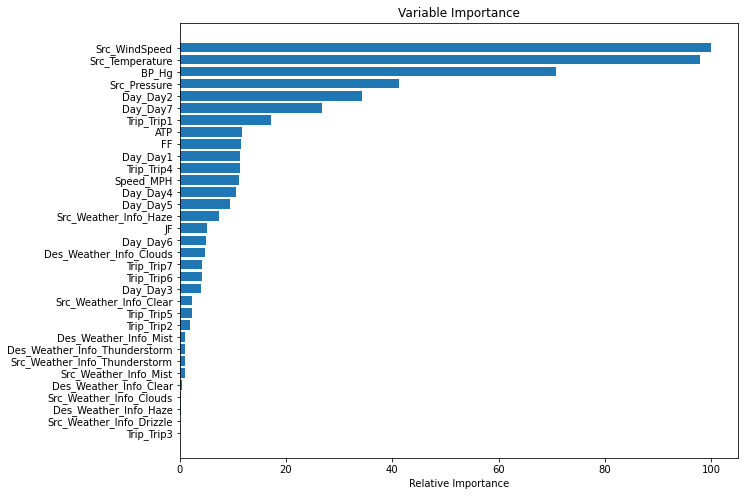

In [24]:
# feature_importance = gb.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# rf=RandomForestRegressor()

In [27]:
# rf.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
# rf.score(X_test, y_test)

0.8133529003570668

In [29]:
# print(rf.feature_importances_)

[9.55164070e-02 8.69230161e-02 7.90707824e-02 4.84003702e-02
 6.14185178e-02 1.70363252e-01 8.01237798e-02 1.42252188e-01
 1.79844322e-02 4.92615477e-02 1.29006107e-02 4.92730301e-03
 1.76566133e-02 1.45538509e-02 1.91018775e-02 8.11976241e-03
 1.05412890e-02 1.18663994e-04 6.55023836e-04 8.79641172e-04
 4.15467901e-04 4.10081811e-03 5.03464578e-03 5.77912860e-04
 6.36319212e-04 2.99137545e-04 2.26763477e-02 1.34630852e-02
 7.89144658e-03 1.14487701e-02 2.01952963e-03 9.01772502e-03
 1.64986483e-03]


[17 25 20 23 24 18 19 32 30 21 11 22 28 15 31 16 29 10 27 13 12  8 14 26
  3  9  4  2  6  1  0  7  5]


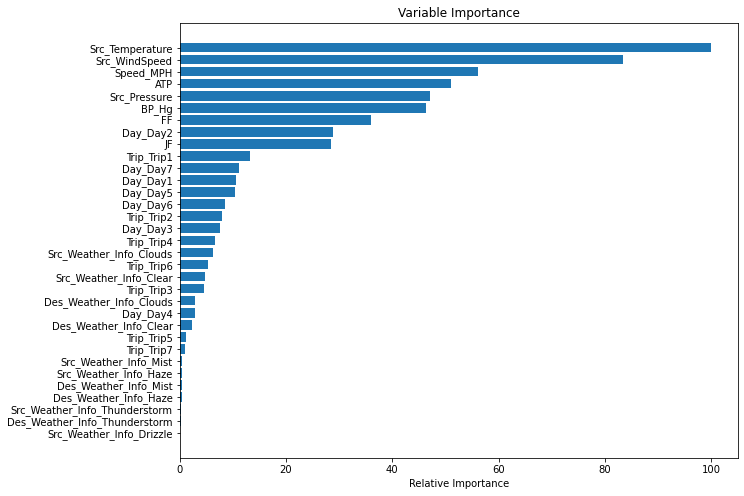

In [30]:
# feature_importance = rf.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [24]:
from sklearn.ensemble import AdaBoostRegressor

In [32]:
# ab=AdaBoostRegressor(loss='exponential', n_estimators=25)

In [33]:
# ab.fit(X_train,y_train)

AdaBoostRegressor(loss='exponential', n_estimators=25)

In [34]:
# ab.score(X_test, y_test)

0.22719265702938285

[16 30 28 25 24 23 21 20 19 18 17 31 32 10 12 11 29 15 13  8 22  3 27  1
 26 14  4  0  5  2  9  7  6]


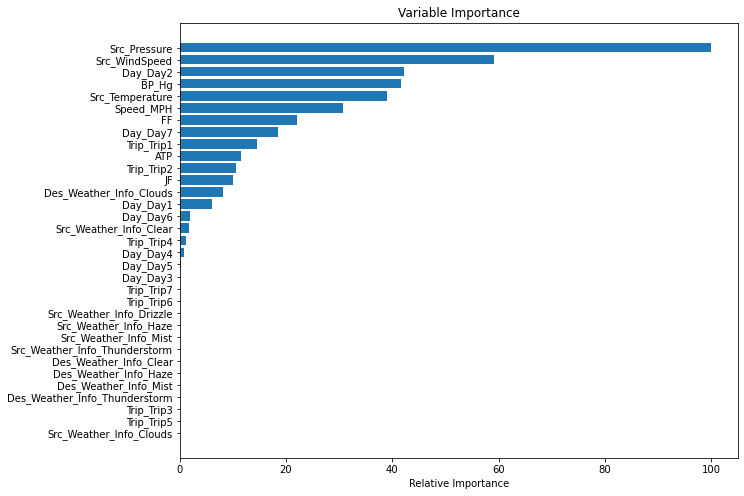

In [35]:
# feature_importance = ab.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
# dt=DecisionTreeRegressor()

In [38]:
# dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
# dt.score(X_test, y_test)

0.7050773509081514

[24 23 18 25 20 17 15 19 32 22 30 11  8 14 21 28 16 27 31 13 12 29 10 26
  3  4  9  2  1  0  6  5  7]


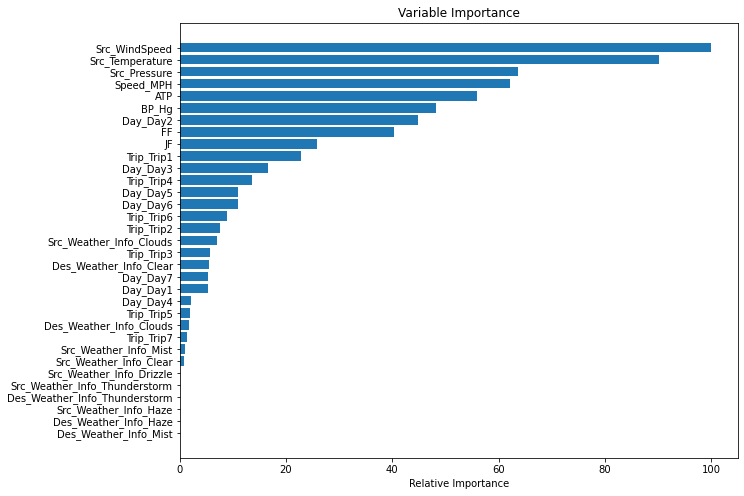

In [40]:
# feature_importance = dt.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# pos = np.arange(sorted_idx.shape[0]) + .5
# f=plt.figure()
# f.set_figwidth(10)
# f.set_figheight(8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.keys()[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [26]:
from sklearn.linear_model import ElasticNet

In [42]:
# en=ElasticNet(alpha=0.1)

In [43]:
# en.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [44]:
# en.score(X_test,y_test)

0.17009544263784682

20 features, reduction of 39.39%


<AxesSubplot:>

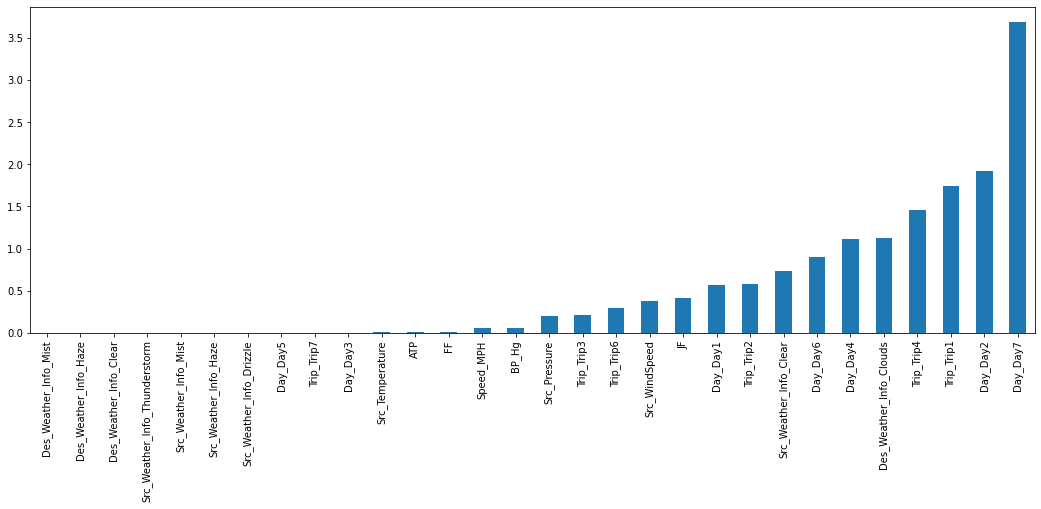

In [45]:
# feature_importance = pd.Series(index = X_train.columns, data = np.abs(en.coef_))

# n_selected_features = (feature_importance>0).sum()
# print('{0:d} features, reduction of {1:2.2f}%'.format(
#     n_selected_features,(1-n_selected_features/len(feature_importance))*100))

# feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

In [27]:
from sklearn.ensemble import VotingRegressor

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [30]:
import xgboost as xgb

In [43]:
# bst=xgb.train(X_train.values, y_train.values)

In [ ]:
# xgb.fit(X_train,y_train)

In [ ]:
# xgb.score(X_test, y_test)

In [31]:
def get_models():
    models = list()
    models.append(('dt', DecisionTreeRegressor()))
    models.append(('gb', GradientBoostingRegressor()))
    models.append(('ab', AdaBoostRegressor()))
    models.append(('rf', RandomForestRegressor()))
    return models

In [32]:
from sklearn.metrics import accuracy_score
def evaluate(models, X_train, X_test, y_train, y_test):
    scores = list()
    for name, model in models:
        model.fit(X_train, y_train)
        score=model.score(X_test,y_test)
        scores.append(score)
    return scores

In [33]:
models=get_models()

In [34]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [35]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [36]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.6947468287389146, 0.5805517593153383,
                         0.2607577929477308, 0.8064213448625164])

In [37]:
ensemble.score(X_test, y_test)

0.7789672012520392

In [38]:
def feature_importance(ensemble, weights):
    feature_importance = dict()
    for est in ensemble.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [39]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
final_df.sort_values('Importance', ascending=False)

,Feature,Importance
7,Src_WindSpeed,0.449599
26,Age,0.230255
5,Src_Temperature,0.201008
6,Src_Pressure,0.181992
0,Speed_MPH,0.152073
32,Openness,0.148474
1,ATP,0.123000
4,FF,0.110942
9,Day_Day2,0.095747
3,JF,0.072807


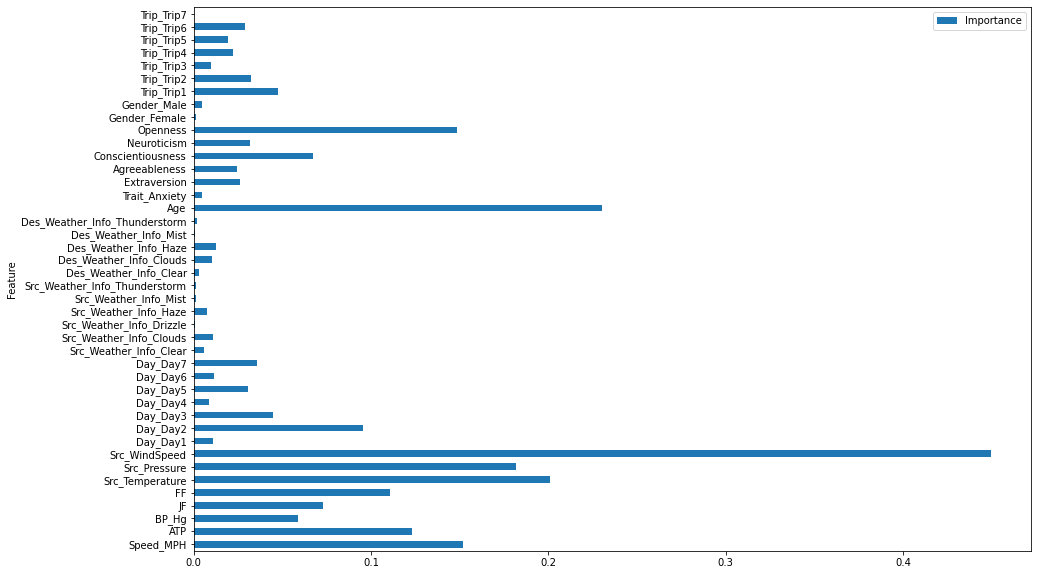

In [40]:
ax = final_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

As we can see, wind speed, pressure, and temperature are the best predictors of BPM according to the models. Wind speed and pressure are plausible, but temperature seems a little weird. 

## Predict BPM Div

In [45]:
temp=df_2['BPM Div']
df_4=df_2.drop(['BPM', 'BPM Div'], axis=1)
Y=temp.values
X=df_2.values

In [47]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_4.iloc[train_index],df_4.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [48]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [49]:
models=get_models()

In [50]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [51]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [52]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.6917800677231698, 0.572184690470988,
                         0.19878524277556653, 0.8026460972406031])

In [53]:
ensemble.score(X_test, y_test)

0.7793456272954613

In [54]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
final_df.sort_values('Importance', ascending=False)

,Feature,Importance
7,Src_WindSpeed,0.374934
5,Src_Temperature,0.251630
6,Src_Pressure,0.166099
26,Age,0.160968
0,Speed_MPH,0.152983
1,ATP,0.119746
4,FF,0.104577
3,JF,0.086466
32,Openness,0.079224
28,Extraversion,0.070456


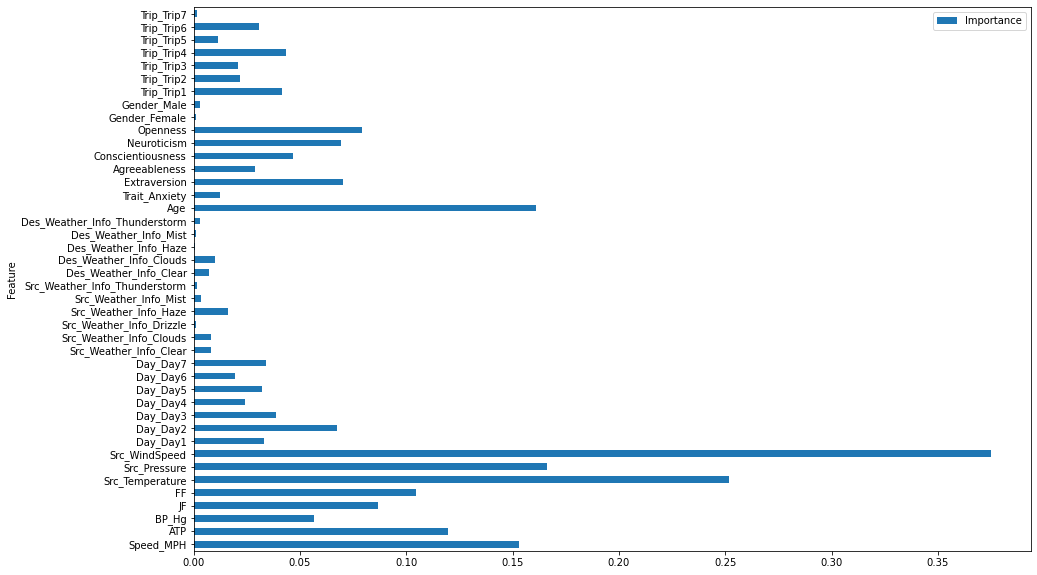

In [55]:
ax = final_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

No notable difference between when BPM is subtracted or divided, as suspected. 

# Normalizing the Data to check if anything changes

In [49]:
normalized_df=(df_2-df_2.min())/(df_2.max()-df_2.min())

In [50]:
temp=normalized_df['BPM']
df_5=normalized_df.drop(['BPM'], axis=1)
Y=temp.values
X=normalized_df.values

In [51]:
for train_index,val_index in kf.split(X):
    X_train,X_test = df_5.iloc[train_index],df_5.iloc[val_index],
    y_train,y_test = temp.iloc[train_index],temp.iloc[val_index]

In [52]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

In [53]:
scores=evaluate(models, X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [54]:
ensemble=VotingRegressor(estimators=models, weights=scores)

In [55]:
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor()),
                            ('rf', RandomForestRegressor())],
                weights=[0.7705439204532545, 0.7149363419386653,
                         0.4342777723906014, 0.8571083326644529])

In [56]:
ensemble.score(X_test, y_test)

0.8287418701072775

In [57]:
final_df=pd.DataFrame()
final_df['Feature']=X_train.columns
final_df['Importance']=feature_importance(ensemble, scores)
final_df.sort_values('Importance', ascending=False)

,Feature,Importance
26,Age,0.622255
7,Src_WindSpeed,0.264735
27,Trait_Anxiety,0.257459
28,Extraversion,0.217122
5,Src_Temperature,0.181827
6,Src_Pressure,0.167389
9,Day_Day2,0.167053
0,Speed_MPH,0.123438
4,FF,0.122016
1,ATP,0.091946


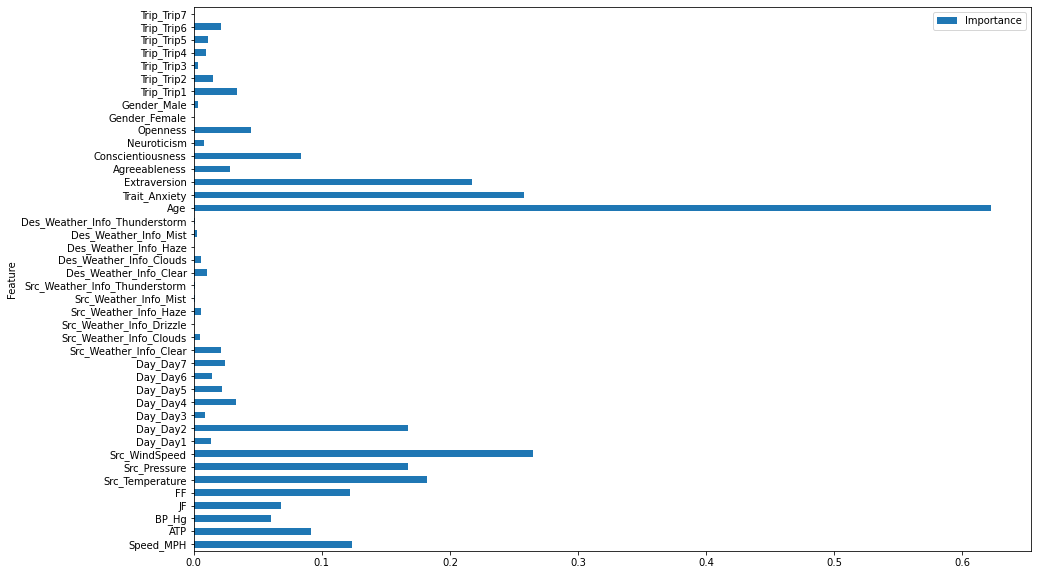

In [58]:
ax = final_df.plot.barh(x='Feature',y='Importance', rot=0, figsize=(15,10))

In [59]:
normalized_df

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Day_Day1,...,Openness,Gender_Female,Gender_Male,Trip_Trip1,Trip_Trip2,Trip_Trip3,Trip_Trip4,Trip_Trip5,Trip_Trip6,Trip_Trip7
8906,0.207071,0.185714,0.764550,0.250000,0.246125,0.269353,0.545894,0.666667,0.428808,0.0,...,0.428571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8911,0.095960,0.219780,0.764550,0.278846,0.221750,0.284720,0.545894,0.666667,0.428808,0.0,...,0.428571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8912,0.222222,0.182418,0.764550,0.250000,0.246125,0.269353,0.545894,0.666667,0.428808,0.0,...,0.428571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8920,0.003367,0.185714,0.764550,0.336538,0.311389,0.321687,0.545894,0.666667,0.428808,0.0,...,0.428571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8933,0.033670,0.190110,0.764550,0.365385,0.311389,0.321687,0.545894,0.666667,0.428808,0.0,...,0.428571,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064695,0.154882,0.185348,0.780423,0.240385,0.090909,0.571180,0.813299,0.809524,0.428808,0.0,...,0.571429,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2064700,0.202020,0.120879,0.780423,0.259615,0.090909,0.571180,0.813299,0.809524,0.428808,0.0,...,0.571429,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2064704,0.151515,0.113736,0.780423,0.230769,0.090909,0.571180,0.813299,0.809524,0.428808,0.0,...,0.571429,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2064710,0.045455,0.154396,0.780423,0.278846,0.090909,0.571180,0.813299,0.809524,0.428808,0.0,...,0.571429,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
